Logistic Regression Accuracy: 0.8053
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1033
         Yes       0.65      0.57      0.61       374

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



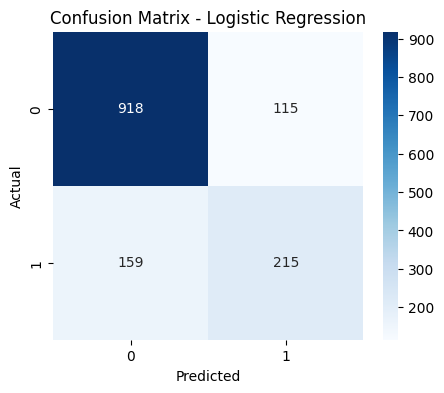

Random Forest Accuracy: 0.7875
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1033
         Yes       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



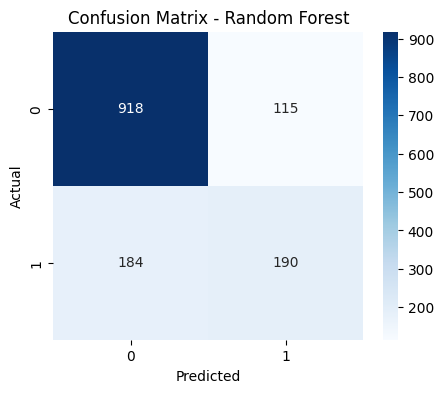

Support Vector Machine Accuracy: 0.7854
              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1033
         Yes       0.63      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



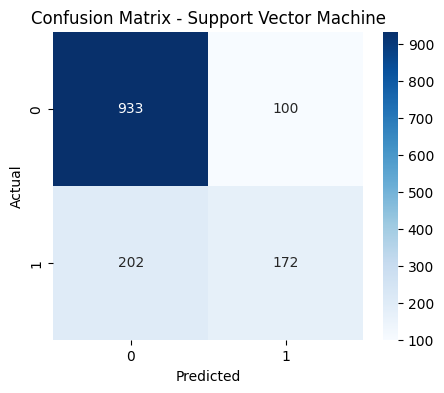

Saved the best model (Logistic Regression) with accuracy 0.8053


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import joblib

project_root = os.getcwd()
path = os.path.join(project_root, "../data/cleaned.csv")
df = pd.read_csv(path)

df = df.drop(columns=['customerID'], errors='ignore')

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

numeric_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC()
}

best_model = None
best_acc = 0
best_model_name = ""

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix visualization
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    if name == "Logistic Regression":
        best_model = model
        best_model_name = name
        best_acc = acc

# Save the Logistic Regression model
if best_model:
    joblib.dump(best_model, 'churn_prediction_logistic_regression.pkl')
    print(f"Saved the best model ({best_model_name}) with accuracy {best_acc:.4f}")
